<a href="https://colab.research.google.com/github/seki-yue/ScarDetection-AD/blob/main/codes/scarDetection_anomalib_V2_epoch100_cfa_both.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/seki-yue/ScarDetection-AD.git
%cd ScarDetection-AD
!unzip anomalibDataset-V2.zip
%cd ..

fatal: destination path 'ScarDetection-AD' already exists and is not an empty directory.
/content/ScarDetection-AD
Archive:  anomalibDataset-V2.zip
replace anomalibDataset_V2/both/anomaly_images/Image_20241203141532453_bmp_jpg.rf.0a58dabc7fff2757fe50ab2bdbaf0e57.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace anomalibDataset_V2/both/anomaly_images/Image_20241203141532453_bmp_jpg.rf.8a323096f0c8282d4b2510022650a5fc.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: /content


In [ ]:
!pip install -q huggingface_hub

from huggingface_hub import hf_hub_download

hf_hub_download(
    repo_id="sekiyue/anomalibDataset",
    filename="anomalibDataset_V2.zip",
    repo_type="dataset",
    local_dir="/content"
)

!unzip anomalibDataset_V2.zip

Archive:  anomalibDataset_V2.zip
   creating: anomalibDataset_V2/
   creating: anomalibDataset_V2/both/
   creating: anomalibDataset_V2/both/anomaly_images/
  inflating: anomalibDataset_V2/both/anomaly_images/Image_20241203141532453_bmp_jpg.rf.0a58dabc7fff2757fe50ab2bdbaf0e57.jpg  
  inflating: anomalibDataset_V2/both/anomaly_images/Image_20241203141532453_bmp_jpg.rf.8a323096f0c8282d4b2510022650a5fc.jpg  
  inflating: anomalibDataset_V2/both/anomaly_images/Image_20241203141532453_bmp_jpg.rf.b12c6733abb86bb9da456b61c5bd94ae.jpg  
  inflating: anomalibDataset_V2/both/anomaly_images/Image_20241203141532453_bmp_jpg.rf.c68aff1191b27498be7731c56b97dbb3.jpg  
  inflating: anomalibDataset_V2/both/anomaly_images/Image_20241203141532453_bmp_jpg.rf.cc399f7b4fdcd1cb9be4ce1cac795ffd.jpg  
  inflating: anomalibDataset_V2/both/anomaly_images/Image_20241203141541228_bmp_jpg.rf.54236717e7142dd6b2e6a4f920e8bf5c.jpg  
  inflating: anomalibDataset_V2/both/anomaly_images/Image_20241203141544062_bmp_jpg.rf.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/

Mounted at /content/drive
/content/drive/MyDrive


In [ ]:
# 1. Install the latest version of Anomalib with its core dependencies.
!pip install anomalib
!pip install open_clip_torch #before importing enging, open_clip_torch need to be install first.

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 831.8/831.8 kB 48.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.5/228.5 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 828.5/828.5 kB 55.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 44.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 93.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 760.5/760.5 kB 53.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 832.4/832.4 kB 53.8 MB/s eta 0:00:00
  Created wheel for freia: filename=FrEIA-0.2-py3-none-any.whl size=42763 sha256=361eae25eb58ea8e805c866b16b01791b3202bda34ed4048ba477d607dc428ae
  Stored in directory: /root/.cache/pip/wheels/ae/40/63/f30f17a00a5c53f982c5c222995b53fe1ee510d2ea13b00856
Successfully built freia
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# 2. import required modules
from anomalib.data import Folder
from anomalib.engine import Engine
from anomalib.models import Cfa
from anomalib.deploy import ExportType

In [ ]:
# adjust and check image_size
from PIL import Image
from pathlib import Path

root_dir = Path("/content/anomalibDataset_V2/both")   # <-- check path, type of dataset
new_size = (640,640)                    # (width, height)

for img_path in root_dir.rglob("*.*"):    # search through all subfolders
    if img_path.suffix.lower() in [".jpg", ".jpeg", ".png", ".bmp", ".tiff"]:
        try:
            with Image.open(img_path) as im:
                im_resized = im.resize(new_size, Image.LANCZOS)
                im_resized.save(img_path)          # overwrite original file
        except Exception as e:
            print(f"Skipped {img_path}: {e}")
check_image = Image.open("/content/anomalibDataset_V2/both/test-normal/Image_20241203140126737_bmp.rf.84eb7a97dd223e3df6754b1dea51098c.jpg")
print("image_size: ", check_image.size)

In [ ]:
# 3. create a costom dataset
datamodule = Folder (
    name="both", # <-- check type of dataset
    root="/content/anomalibDataset_V2/both", # <-- check path, type of dataset
    normal_dir="normal",
    abnormal_dir="anomaly_images",
    mask_dir="anomaly_masks"
)

In [ ]:
# 4. Initialize the model
model = Cfa()

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Wide_ResNet50_2_Weights.IMAGENET1K_V1`. You can also use `weights=Wide_ResNet50_2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/wide_resnet50_2-95faca4d.pth" to /root/.cache/torch/hub/checkpoints/wide_resnet50_2-95faca4d.pth


100%|██████████| 132M/132M [00:00<00:00, 211MB/s]


In [ ]:
# 5. create the training engine
engine = Engine(
    max_epochs=100
)

In [ ]:
# 6. train the model
engine.fit(
    datamodule=datamodule,
    model=model
)

INFO:lightning_fabric.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:lightning_fabric.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:lightning_fabric.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:lightning_fabric.utilities.rank_zero:You are using a CUDA device ('NVIDIA A100-SXM4-40GB') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name           | Type          | Params | Mode 
---------------------------------------------------------
0 | pre_processor  | PreProcessor  | 0      | train
1 | post_processor | PostProcessor | 0      | train
2 

Training: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 25/25 [00:18<00:00,  1.32it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:lightning_fabric.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.


In [ ]:
# 7. test the model performance
test_results = engine.test(
    datamodule=datamodule,
    model=model
)

INFO:lightning_fabric.utilities.rank_zero:The following callbacks returned in `LightningModule.configure_callbacks` will override existing callbacks passed to Trainer: Evaluator, ImageVisualizer, PostProcessor, PreProcessor
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│        image_AUROC        │    0.5868431329727173     │
│       image_F1Score       │    0.8466257452964783     │
│        pixel_AUROC        │    0.8034877181053162     │
│       pixel_F1Score       │    0.06877972185611725    │
└───────────────────────────┴───────────────────────────┘

In [ ]:
# 8. export the model
engine.export(
    model=model,
    export_type=ExportType.TORCH,
    export_root="/content/drive/MyDrive/results/Cfa",
    model_file_name="V2_both_cfa" # <-- check type of dataset
    )

PosixPath('/content/drive/MyDrive/results/Cfa/weights/torch/V2_both_cfa.pt')

# Light Inference

In [ ]:
# 1. import required modules
from anomalib.data import PredictDataset

In [ ]:
# 2. initialize the model and load weight
model = Cfa()
engine = Engine()

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Wide_ResNet50_2_Weights.IMAGENET1K_V1`. You can also use `weights=Wide_ResNet50_2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
# 3. prepare test data
dataset = PredictDataset(
    path="/content/anomalibDataset_V2/both/test-anomaly", # <-- check path, type of dataset
    image_size=(256,256),
)

In [ ]:
print(len(dataset))

16


In [ ]:
from torch.utils.data import DataLoader

loader = DataLoader(
    dataset,
    batch_size=2,          # or 1
    shuffle=False,
    num_workers=0,
    collate_fn=dataset.collate_fn, # <-- critical
)

predictions = engine.predict(
    model=model,
    dataloaders=loader,
    ckpt_path="/content/drive/MyDrive/results/Cfa/both/v0/weights/lightning/model.ckpt" # <-- check path, type of dataset
)


INFO:lightning_fabric.utilities.rank_zero:The following callbacks returned in `LightningModule.configure_callbacks` will override existing callbacks passed to Trainer: Evaluator, ImageVisualizer, PostProcessor, PreProcessor
INFO:lightning_fabric.utilities.rank_zero:Restoring states from the checkpoint path at /content/drive/MyDrive/results/Cfa/both/v0/weights/lightning/model.ckpt
/usr/local/lib/python3.12/dist-packages/lightning/pytorch/callbacks/model_checkpoint.py:445: The dirpath has changed from '/content/drive/MyDrive/results/Cfa/both/v0/weights/lightning' to '/content/drive/MyDrive/results/Cfa/latest/weights/lightning', therefore `best_model_score`, `kth_best_model_path`, `kth_value`, `last_model_path` and `best_k_models` won't be reloaded. Only `best_model_path` will be reloaded.
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning_fabric.utilities.rank_zero:Loaded model weights from the

Predicting: |          | 0/? [00:00<?, ?it/s]

Found 16 images


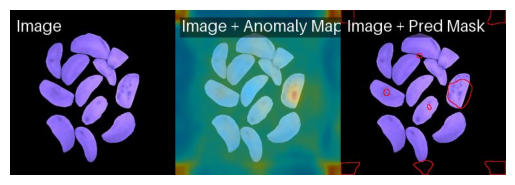

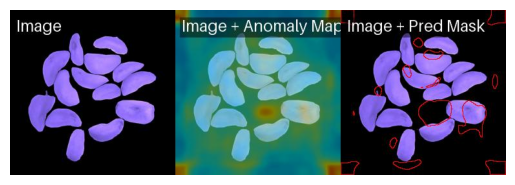

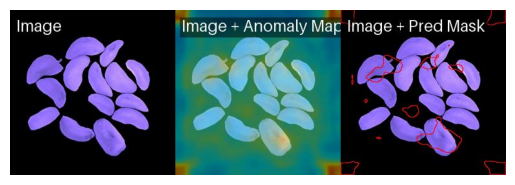

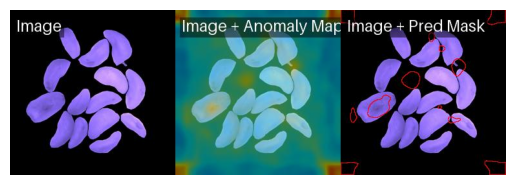

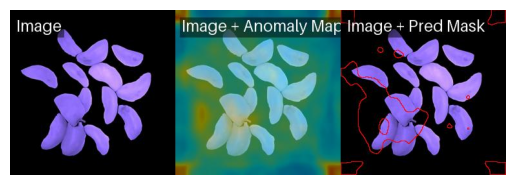

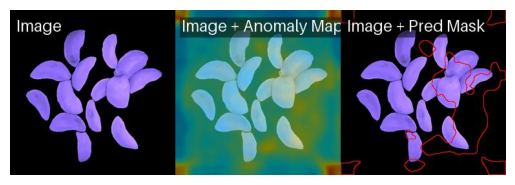

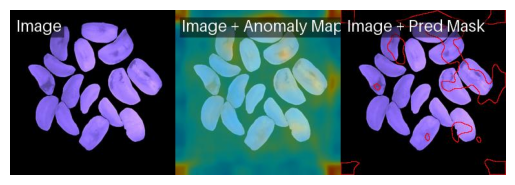

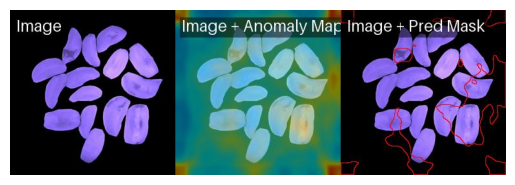

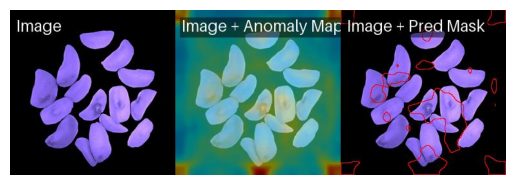

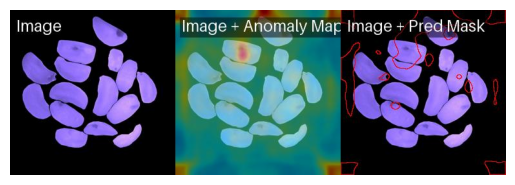

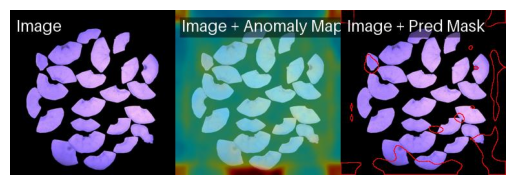

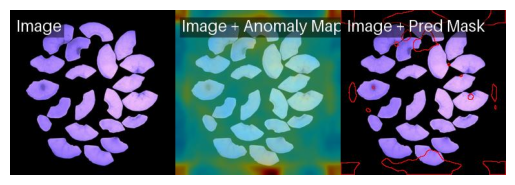

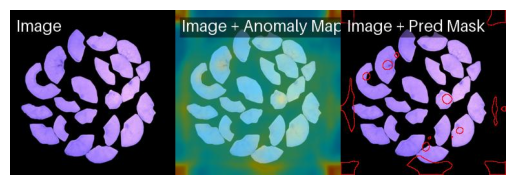

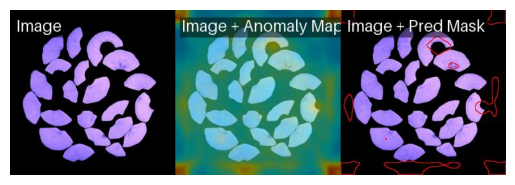

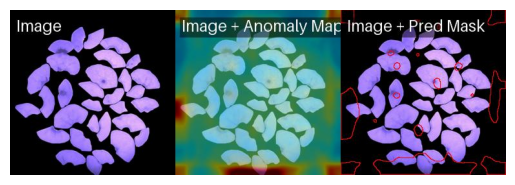

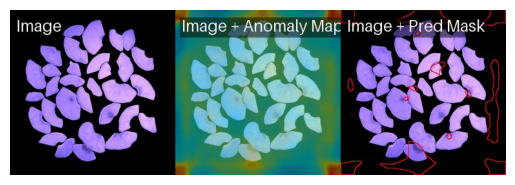

In [ ]:
import glob
import os
from PIL import Image
import matplotlib.pyplot as plt

folder = "/content/drive/MyDrive/results/Cfa/latest/images/test-anomaly"   # <-- change to your folder path
image_paths = sorted(
    glob.glob(os.path.join(folder, "*.*"))  # grabs jpg, png, etc.
)

print(f"Found {len(image_paths)} images")

for image_path in image_paths:
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis("off")
    plt.show()


INFO:lightning_fabric.utilities.rank_zero:The following callbacks returned in `LightningModule.configure_callbacks` will override existing callbacks passed to Trainer: Evaluator, ImageVisualizer, PostProcessor, PreProcessor
INFO:lightning_fabric.utilities.rank_zero:Restoring states from the checkpoint path at /content/drive/MyDrive/results/Cfa/both/v0/weights/lightning/model.ckpt
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


predicting 16 normal images.


INFO:lightning_fabric.utilities.rank_zero:Loaded model weights from the checkpoint at /content/drive/MyDrive/results/Cfa/both/v0/weights/lightning/model.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

Found 16 predicted normal images


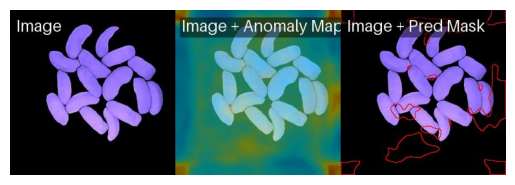

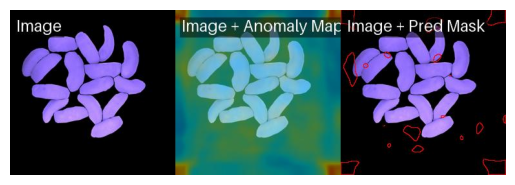

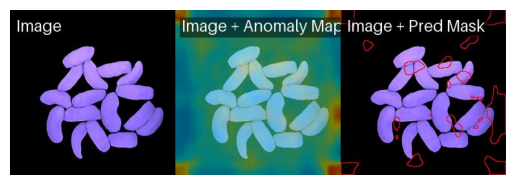

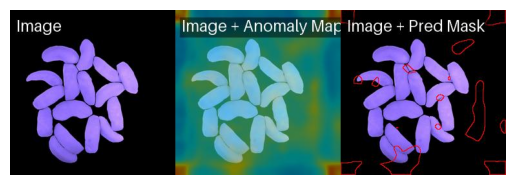

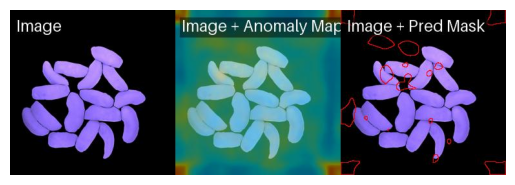

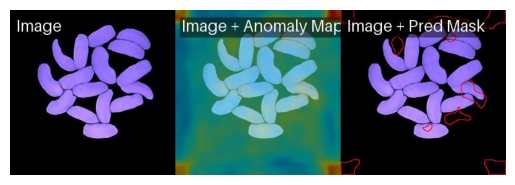

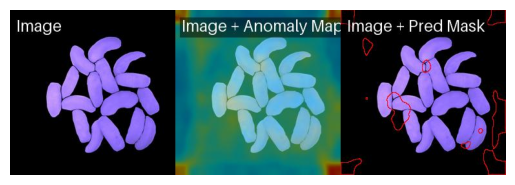

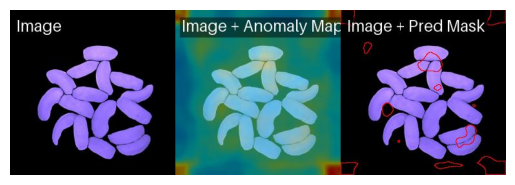

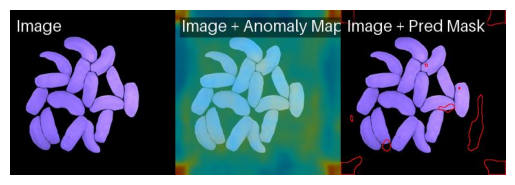

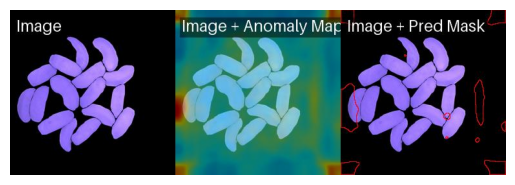

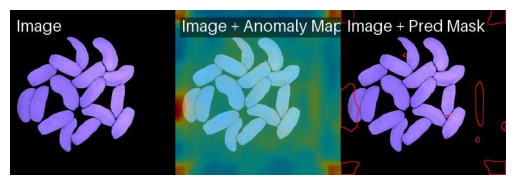

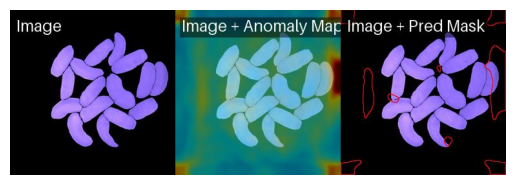

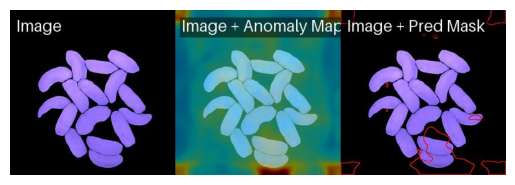

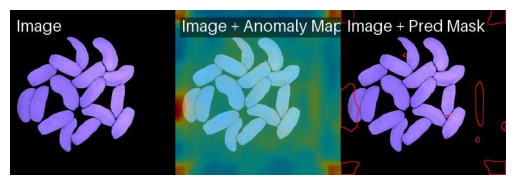

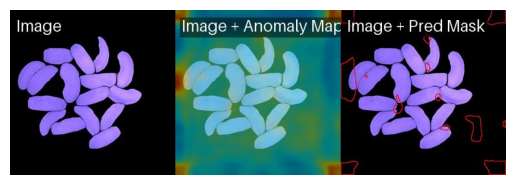

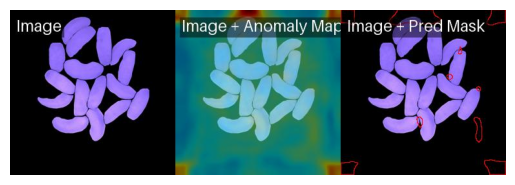

In [ ]:
# 3. prepare test data
dataset = PredictDataset(
    path="/content/anomalibDataset_V2/both/test-normal", # <-- check path, type of dataset
    image_size=(256,256),
)

print("predicting", len(dataset), "normal images.")

from torch.utils.data import DataLoader

loader = DataLoader(
    dataset,
    batch_size=2,          # or 1
    shuffle=False,
    num_workers=0,
    collate_fn=dataset.collate_fn, # <-- critical
)

predictions = engine.predict(
    model=model,
    dataloaders=loader,
    ckpt_path="/content/drive/MyDrive/results/Cfa/both/v0/weights/lightning/model.ckpt", # <-- check path, type of dataset
)
import glob
import os
from PIL import Image
import matplotlib.pyplot as plt

folder = "/content/drive/MyDrive/results/Cfa/latest/images/test-normal"   # <-- change to your folder path
image_paths = sorted(
    glob.glob(os.path.join(folder, "*.*"))  # grabs jpg, png, etc.
)

print(f"Found {len(image_paths)} predicted normal images")

for image_path in image_paths:
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis("off")
    plt.show()
